<font size = 8 color ='336EFF'>Activating function</font>


Import Libraries

In [1]:
# your code
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

Import extra Libraries for Tensorflow

In [2]:
# your code
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2

Load the Fashion MNIST data set

In [3]:
# your code
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
print(X_train_full.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Plot example of the data set

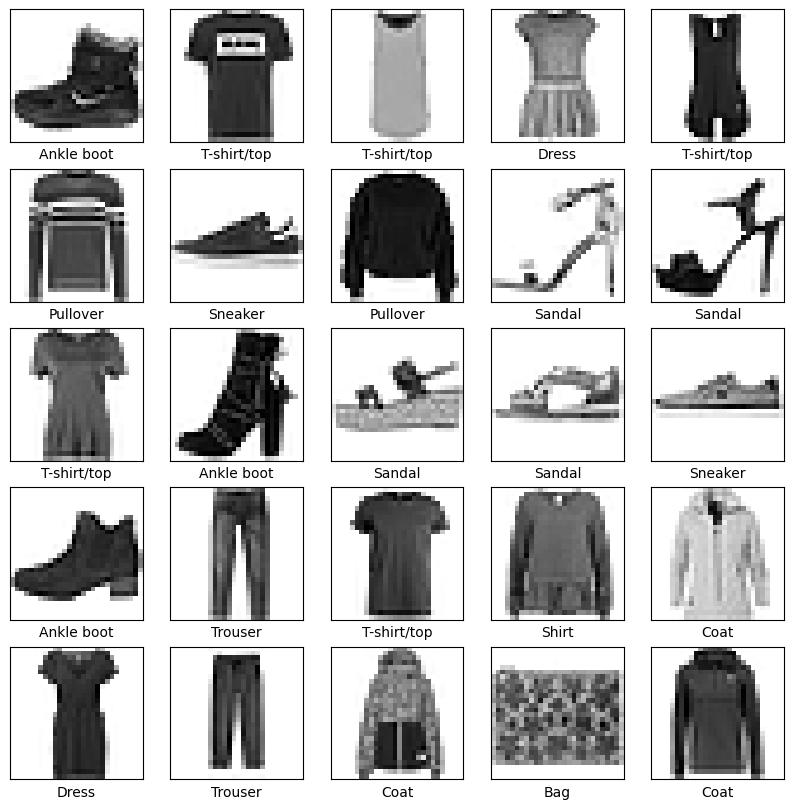

In [4]:
# your code
# Define class names for labeling
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Create a function to display images
def plot_images(images, labels, class_names, num_images=25):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

# Plot examples from the training set
plot_images(X_train_full, y_train_full, class_names)

Reshape the images

In [5]:
# your code
X_train_flat = X_train_full.reshape(-1, 784)  # -1 infers the number of samples
X_test_flat = X_test.reshape(-1, 784)

Convert to categorical

In [6]:
# your code
# Number of classes in your dataset (Fashion MNIST has 10 classes)
num_classes = 10

# Convert the labels to one-hot encoded categorical variables
y_train_categorical = to_categorical(y_train_full, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)


### Create two models
10->256->512->256->10 units use two types of activating function for the hidden layers and softmax for the output, kernel regularizer l2 include one Dropout layer in between each layer with a probability of 20%. For the compilation use categorical crossentropy for the loss, Optimizer SGD with a learning rate 0.001, include the metrics accuracy

In [7]:
# your code
# Define the common dropout rate
dropout_rate = 0.2

# Create a function to build a model with a specific activation function
def build_model(activation):
    model = Sequential([
        # Input layer
        Dense(256, activation=activation, input_shape=(784,), kernel_regularizer=l2(0.01)),
        Dropout(dropout_rate),

        # Hidden layer 1
        Dense(512, activation=activation, kernel_regularizer=l2(0.01)),
        Dropout(dropout_rate),

        # Hidden layer 2
        Dense(256, activation=activation, kernel_regularizer=l2(0.01)),
        Dropout(dropout_rate),

        # Output layer with softmax activation
        Dense(10, activation='softmax')
    ])

    return model

# Create models with ReLU and Tanh activations
model_relu = build_model('relu')
model_tanh = build_model('tanh')

# Compile the models
def compile_model(model):
    model.compile(
        loss='categorical_crossentropy',
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
        metrics=['accuracy']
    )

# Compile both models
compile_model(model_relu)
compile_model(model_tanh)

Visualize the model 01

In [8]:
# your code
# Display the model summary
model_relu.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2

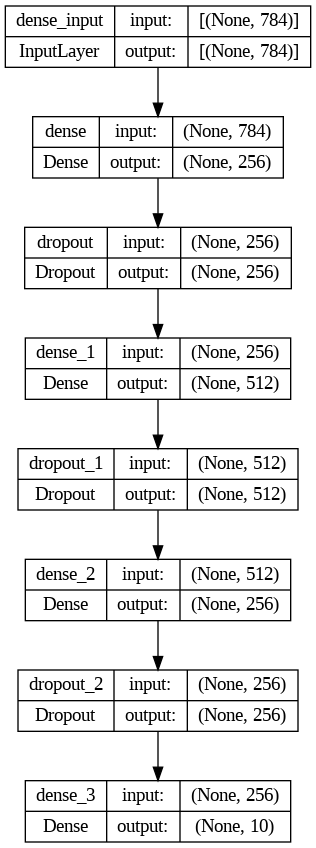

In [9]:
from tensorflow.keras.utils import plot_model

# Plot the model architecture to a file (e.g., 'model_relu.png')
plot_model(model_relu, to_file='model_relu.png', show_shapes=True, show_layer_names=True)


Visualize the model 02

In [10]:
# your code
model_tanh.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               131584    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 10)               

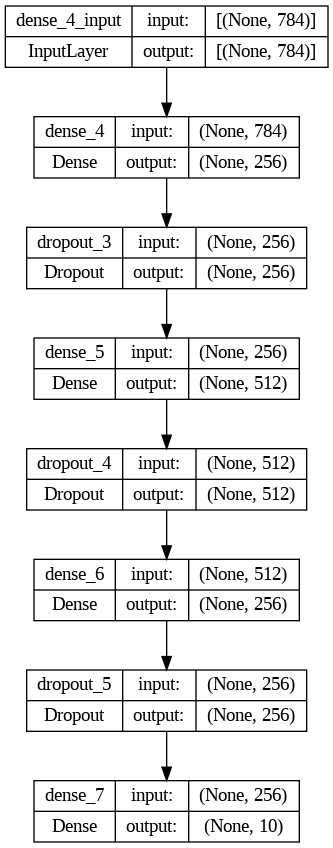

In [11]:
# Plot the model architecture to a file (e.g., 'model_relu.png')
plot_model(model_tanh, to_file='model_relu.png', show_shapes=True, show_layer_names=True)

# Training

In [12]:
# Training hyperparameters
epochs = 20  # You can adjust the number of epochs as needed
batch_size = 64

Train Model 01

In [13]:
# your code
# Train the model with ReLU activation
history_relu = model_relu.fit(X_train_flat, y_train_categorical,
                              epochs=epochs, batch_size=batch_size,
                              validation_split=0.2, verbose=2)

Epoch 1/20
750/750 - 15s - loss: 13.0579 - accuracy: 0.6039 - val_loss: 11.1279 - val_accuracy: 0.7283 - 15s/epoch - 19ms/step
Epoch 2/20
750/750 - 13s - loss: 11.1419 - accuracy: 0.6901 - val_loss: 10.6787 - val_accuracy: 0.7766 - 13s/epoch - 17ms/step
Epoch 3/20
750/750 - 12s - loss: 10.6699 - accuracy: 0.7254 - val_loss: 10.2605 - val_accuracy: 0.8037 - 12s/epoch - 16ms/step
Epoch 4/20
750/750 - 7s - loss: 10.2824 - accuracy: 0.7483 - val_loss: 9.9447 - val_accuracy: 0.8108 - 7s/epoch - 9ms/step
Epoch 5/20
750/750 - 6s - loss: 9.9391 - accuracy: 0.7602 - val_loss: 9.6557 - val_accuracy: 0.8166 - 6s/epoch - 8ms/step
Epoch 6/20
750/750 - 7s - loss: 9.6245 - accuracy: 0.7724 - val_loss: 9.3562 - val_accuracy: 0.8183 - 7s/epoch - 10ms/step
Epoch 7/20
750/750 - 6s - loss: 9.3265 - accuracy: 0.7779 - val_loss: 9.0826 - val_accuracy: 0.8253 - 6s/epoch - 8ms/step
Epoch 8/20
750/750 - 7s - loss: 9.0471 - accuracy: 0.7854 - val_loss: 8.8201 - val_accuracy: 0.8248 - 7s/epoch - 10ms/step
Epoch 

Train Model 02

In [14]:
# your code
# Train the model with Tanh activation
history_tanh = model_tanh.fit(X_train_flat, y_train_categorical,
                              epochs=epochs, batch_size=batch_size,
                              validation_split=0.2, verbose=2)


Epoch 1/20
750/750 - 8s - loss: 11.9229 - accuracy: 0.5229 - val_loss: 11.2171 - val_accuracy: 0.7084 - 8s/epoch - 11ms/step
Epoch 2/20
750/750 - 6s - loss: 11.1319 - accuracy: 0.6812 - val_loss: 10.7703 - val_accuracy: 0.7552 - 6s/epoch - 8ms/step
Epoch 3/20
750/750 - 7s - loss: 10.7185 - accuracy: 0.7168 - val_loss: 10.4223 - val_accuracy: 0.7631 - 7s/epoch - 10ms/step
Epoch 4/20
750/750 - 6s - loss: 10.3668 - accuracy: 0.7395 - val_loss: 10.0995 - val_accuracy: 0.7748 - 6s/epoch - 8ms/step
Epoch 5/20
750/750 - 7s - loss: 10.0415 - accuracy: 0.7539 - val_loss: 9.7912 - val_accuracy: 0.7898 - 7s/epoch - 10ms/step
Epoch 6/20
750/750 - 6s - loss: 9.7424 - accuracy: 0.7664 - val_loss: 9.5062 - val_accuracy: 0.7971 - 6s/epoch - 8ms/step
Epoch 7/20
750/750 - 7s - loss: 9.4585 - accuracy: 0.7702 - val_loss: 9.2313 - val_accuracy: 0.8014 - 7s/epoch - 10ms/step
Epoch 8/20
750/750 - 6s - loss: 9.1792 - accuracy: 0.7779 - val_loss: 8.9611 - val_accuracy: 0.8064 - 6s/epoch - 8ms/step
Epoch 9/20


### Predict your test dataset and obtain confusion matrix and classification report

Predict model 01

In [15]:
# your code
# Predict using the ReLU model
predictions_relu = model_relu.predict(X_test_flat)

313/313 [==============================] - 1s 3ms/step


Predict model 02

In [16]:
# your code
# Predict using the Tanh model
predictions_tanh = model_tanh.predict(X_test_flat)

313/313 [==============================] - 1s 3ms/step


Argmax using axis equal to 1

Predict Model 01

In [17]:
# your code
# Convert predictions to class labels (argmax)
predicted_labels_relu = predictions_relu.argmax(axis=1)

Predict Model 02

In [18]:
# your code
predicted_labels_tanh = predictions_tanh.argmax(axis=1)

Evaluate which model is more accurate

In [19]:
# your code
from sklearn.metrics import accuracy_score
# Convert one-hot encoded labels to class labels (argmax)
true_labels = y_test

# Calculate accuracy for both models
accuracy_relu = accuracy_score(true_labels, predicted_labels_relu)
accuracy_tanh = accuracy_score(true_labels, predicted_labels_tanh)

print(f"Accuracy for ReLU model: {accuracy_relu:.4f}")
print(f"Accuracy for Tanh model: {accuracy_tanh:.4f}")

Accuracy for ReLU model: 0.8423
Accuracy for Tanh model: 0.8198


Confusion matrix and classification report

In [20]:
# your code
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
# your code
# Calculate the confusion matrix for the ReLU model
confusion_matrix_relu = confusion_matrix(true_labels, predicted_labels_relu)

# Calculate the confusion matrix for the Tanh model
confusion_matrix_tanh = confusion_matrix(true_labels, predicted_labels_tanh)

# Print the confusion matrices
print("Confusion Matrix for ReLU Model:")
print(confusion_matrix_relu)

print("\nConfusion Matrix for Tanh Model:")
print(confusion_matrix_tanh)

Confusion Matrix for ReLU Model:
[[847   4  12  33   5   4  83   0  12   0]
 [  4 964   1  22   4   0   3   0   2   0]
 [ 21   4 663   8 235   0  59   0   9   1]
 [ 46  12  17 835  59   0  25   0   5   1]
 [  1   1  68  19 816   0  90   0   5   0]
 [  0   0   0   1   0 939   0  35   3  22]
 [218   6 112  27 108   0 511   0  18   0]
 [  0   0   0   0   0  26   0 947   0  27]
 [  1   0   7   3   7   0  20   4 958   0]
 [  0   0   0   0   0  10   1  46   0 943]]

Confusion Matrix for Tanh Model:
[[789   3  25  70   7   0  84   0  22   0]
 [  4 942  15  33   3   0   1   0   2   0]
 [ 17   0 775  12 130   0  53   0  12   1]
 [ 27  10  18 866  37   1  37   0   4   0]
 [  0   3 161  54 720   0  55   0   7   0]
 [  1   0   0   1   0 894   0  57   6  41]
 [173   2 154  58 164   0 412   0  37   0]
 [  0   0   0   0   0  35   0 916   0  49]
 [  1   1  12   8   3   2  13   6 953   1]
 [  0   0   0   0   0  11   0  58   0 931]]


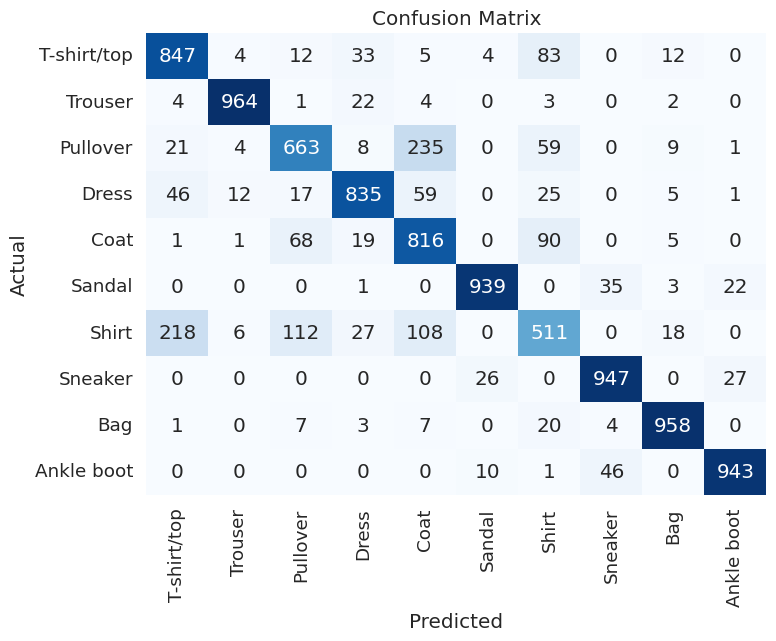

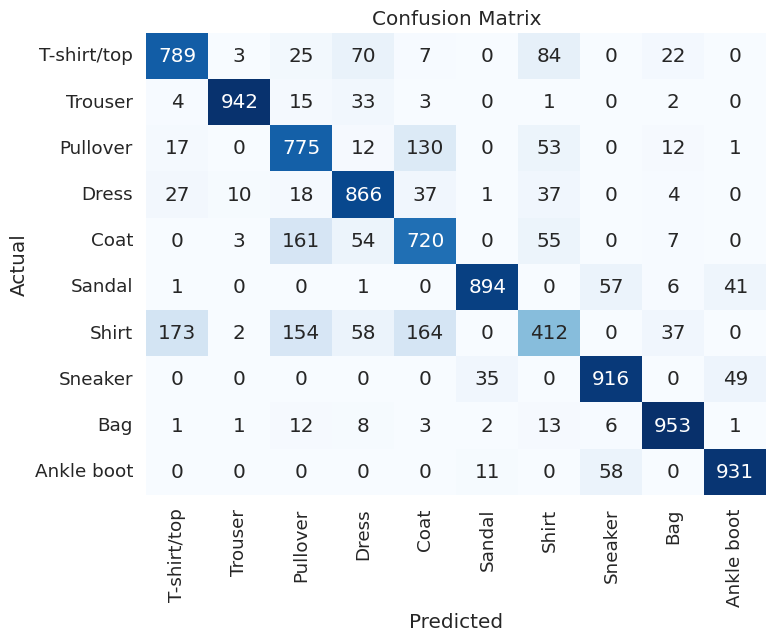

In [22]:
import seaborn as sns
# Create a function to plot a confusion matrix
def plot_confusion_matrix(confusion_matrix, class_names):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Plot the confusion matrix for the ReLU model
plot_confusion_matrix(confusion_matrix_relu, class_names)

# Plot the confusion matrix for the Tanh model
plot_confusion_matrix(confusion_matrix_tanh, class_names)


In [23]:
# your code
# Generate classification reports
classification_report_relu = classification_report(true_labels, predicted_labels_relu, target_names=class_names)
classification_report_tanh = classification_report(true_labels, predicted_labels_tanh, target_names=class_names)

# Print the classification reports
print("\nClassification Report for ReLU Model:")
print(classification_report_relu)

print("\nClassification Report for Tanh Model:")
print(classification_report_tanh)


Classification Report for ReLU Model:
              precision    recall  f1-score   support

 T-shirt/top       0.74      0.85      0.79      1000
     Trouser       0.97      0.96      0.97      1000
    Pullover       0.75      0.66      0.71      1000
       Dress       0.88      0.83      0.86      1000
        Coat       0.66      0.82      0.73      1000
      Sandal       0.96      0.94      0.95      1000
       Shirt       0.65      0.51      0.57      1000
     Sneaker       0.92      0.95      0.93      1000
         Bag       0.95      0.96      0.95      1000
  Ankle boot       0.95      0.94      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000


Classification Report for Tanh Model:
              precision    recall  f1-score   support

 T-shirt/top       0.78      0.79      0.78      1000
     Trouser       0.98      0.94      0.96      1000
